In [8]:
%matplotlib inline

# Exploratory left/right classification using Haar-like feature descriptor



# Face classification using Haar-like feature descriptor


Haar-like feature descriptors were successfully used to implement the first
real-time face detector [1]_. Inspired by this application, we propose an
example illustrating the extraction, selection, and classification of Haar-like
features to detect faces vs. non-faces.

Notes
-----

This example relies on scikit-learn for feature selection and classification.

References
----------

.. [1] Viola, Paul, and Michael J. Jones. "Robust real-time face
       detection." International journal of computer vision 57.2
       (2004): 137-154.
       http://www.merl.com/publications/docs/TR2004-043.pdf
       :DOI:`10.1109/CVPR.2001.990517`




In [1]:
import sys
from time import time

import numpy as np
import matplotlib.pyplot as plt

from dask import delayed

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

The procedure to extract the Haar-like features from an image is relatively
simple. Firstly, a region of interest (ROI) is defined. Secondly, the
integral image within this ROI is computed. Finally, the integral image is
used to extract the features.



In [15]:
#@delayed
def extract_feature_image(img, feature_type, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    return haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

     0  1                    2           3              4              5   \
0  A002  -  20170126_195145.jpg  402.523252  301.503763583  558.891884541   
1  A002  -  20170126_195709.jpg  267.805660   291.88107849  977.478686102   
2  A002  -  20170126_200020.jpg  566.108898  323.154805043  1126.63030505   
3  A002  -  20170126_200756.jpg  325.541771   356.83420287  556.486213268   
4  A002  -  20170126_201013.jpg  347.192812   327.96614759  616.627995101   

              6              7              8              9   ...  \
0   320.74913377  1117.00761996   551.69357601   1203.6117858  ...   
1  628.675056757  1042.43181048  691.222509864  1114.60194868  ...   
2  561.316261103   1203.6117858  635.892070577  1222.85715598  ...   
3  448.249711257  938.987945728   652.73176949   1013.5637552  ...   
4  412.164642157  1119.41329123  633.486399304  1191.58342943  ...   

              15             16             17             18             19  \
0  722.477531128  700.845194957  647

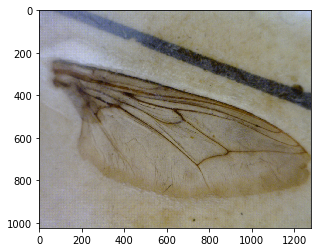

In [27]:
#Read in Label data (result), set wd, test image read-into numpy array

import os
import numpy as np
from PIL import Image

#print(os.getcwd())
os.chdir("/Users/dylan/Projects/Tetse_proj/2/")

import pandas as pd
df = pd.read_fwf('refined_data.txt',header=None)
#?pd.read_fwf
# which function
which = lambda lst:list(np.where(lst)[0])


new = df.iloc[:,4].str.split(" ", n = 23, expand = True)

df= df.drop(labels=4, axis=1)


result = pd.concat([df, new], axis=1, sort=False)

# column numbers were messed up, make them go according to range
result.columns = range(result.shape[1])

result.reset_index(inplace=True, drop=True)
print(result.head())
print(result.iloc[5,[0,1,2]])

img=mpimg.imread(" ".join(result.iloc[5,[0,1,2]]))

#   plt.imshow(img)
plt.imshow(img)
#plt.imshow(rgb2gray(img))
#print(np.shape(rgb2gray(img)))

In [18]:
#test script to thumbnail one image
file, ext = os.path.splitext("A002 - 20170126_162639.jpg")
im = Image.open("A002 - 20170126_162639.jpg")
im.thumbnail([50,50])
im.save(file + "-thumbnail2.jpg", "JPEG")


In [19]:
#read in all pictures based on the names in refined_data.txt, 
#resize them to "thumbnails"
#and save them to a hard-coded (for now) folder called 2_small using the same names as the originals
# (so that the labelling doesn't need adjustment)
# we also manually copied refined_data.txt into the 2_small folder for now

df = pd.read_fwf('refined_data.txt',header=None)
#?pd.read_fwf
# which function
which = lambda lst:list(np.where(lst)[0])

new = df.iloc[:,4].str.split(" ", n = 23, expand = True)

df= df.drop(labels=4, axis=1)

result = pd.concat([df, new], axis=1, sort=False)

# column numbers were messed up, make them go according to range
result.columns = range(result.shape[1])

result.reset_index(inplace=True, drop=True)


#plt.imshow(img)

#result.loc[0,[0]]

result.reset_index(inplace=True, drop=True)
result.columns = range(result.shape[1])

result.loc[0,[0,1,2]]
" ".join(result.loc[0,[0,1,2]])
os.chdir("C:\\Users\\jem\\PycharmProjects\\tsetse\\TseTse Project\\Tsetse Coordinates\\2")
for x in result.index:
    imgname=" ".join(result.loc[x,[0,1,2]])
#    file, ext = os.path.splitext(imgname)
    im = Image.open(imgname)
    im.thumbnail([25,25])    
    os.chdir(".\\2_small")
    im.save(imgname)
#    print(np.as.ndarray(im))
    os.chdir("..\\")

In [20]:
# make all images greyscale

os.chdir("C:\\Users\\jem\\PycharmProjects\\tsetse\\TseTse Project\\Tsetse Coordinates\\2\\2_small")

for x in result.index:
    imgname=" ".join(result.loc[x,[0,1,2]])
#    file, ext = os.path.splitext(imgname)
    img = mpimg.imread(imgname)     
    I = rgb2gray(img)  #make it greyscale
    I8 = (((I-I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8) # the next few lines help us save the images as true greyscale (ie. each image is 2 dimensional)
    os.chdir("bw")
    greyimg = Image.fromarray(I8)
    rescaledwidth, rescaledheight = np.shape(greyimg)
    greyimg.save(imgname)
    #print(np.shape(mpimg.imread(imgname)))
    os.chdir("..\\")
    

imgname=" ".join(result.loc[x,[0,1,2]])
#    file, ext = os.path.splitext(imgname)
os.chdir("bw")
img = mpimg.imread(imgname)  
rescaledwidth, rescaledheight = np.shape(img)
os.chdir("..\\")

In [21]:
#### creates fullset containing all the pictures
#### access the first picture by fullset[1] 
os.chdir("C:\\Users\\jem\\PycharmProjects\\tsetse\\TseTse Project\\Tsetse Coordinates\\2\\2_small\\bw")
fullset = np.ndarray(shape=[464,rescaledwidth,rescaledheight])
print(np.shape(fullset[1]))
for i in range(464):
    fullset[i] = mpimg.imread(" ".join(result.loc[x,[0,1,2]]))
os.chdir("..\\")

(20, 25)


In [22]:
print(fullset[1].max())

255.0


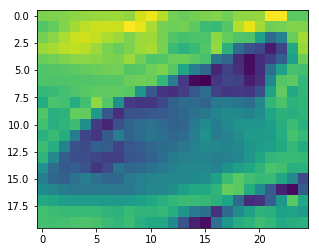

In [23]:
plt.imshow(fullset[1]/255,vmin=0,vmax=1)

numpy.ndarray

In [25]:
#os.chdir("bw")
#print(np.shape(mpimg.imread("A002 - 20170126_195145.jpg")))
#os.chdir("..\\")
print(rescaledwidth,rescaledheight)
print(np.shape(result))
print(np.shape(y))

20 25
(464, 25)
(464,)


In [26]:
#make them grey
#make them small


In [27]:
#np.shape()

In [28]:
#for x in range(461):
#    img=mpimg.imread(" ".join(result.loc[x,[0,1,2]]))
#    #print(np.shape(img))
#    fullset[x] = img
#fullset[5]

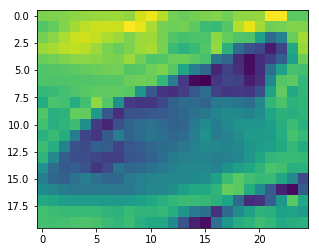

In [29]:
plt.imshow(fullset[5].astype(np.uint8))

In [30]:
np.shape(result)

(464, 25)

In [31]:
#type(result)
images = lfw_subset()
#type(images)
#print(np.shape(images))
#images
images = lfw_subset()
print(type(images))
print(np.shape(images))

<class 'numpy.ndarray'>
(200, 25, 25)


We use a subset of CBCL dataset which is composed of 100 face images and
100 non-face images. Each image has been resized to a ROI of 19 by 19
pixels. We select 75 images from each group to train a classifier and
determine the most salient features. The remaining 25 images from each
class are used to assess the performance of the classifier.



In [32]:
print(np.shape(fullset))

(464, 20, 25)


In [36]:
#print(lfw_subset()[1].max())
#print( lfw_subset()[1])
#print(fullset[1]/255.9)

In [34]:
images = fullset # rescaling to 1 so we avoid getting Nan in "X"
#images = lfw_subset()
print(type(images))
# To speed up the example, extract the two types of features only
feature_types = ['type-2-x']#, 'type-2-y']

# Build a computation graph using Dask. This allows the use of multiple
# CPU cores later during the actual computation
X = delayed(extract_feature_image(img, feature_types) for img in images)
print(X.max())

<class 'numpy.ndarray'>
Delayed('max-2143b377-77a5-4530-b5a1-32f766c713be')


In [35]:
# Compute the result
t_start = time()
X = np.array(X.compute(scheduler='threads'))
time_full_feature_comp = time() - t_start

#y = np.array([1] * 100 + [0] * 100) #this makes a vector of 1s and 0s

### create outcome vector y as in the example
### y contains a vector of TRUE and FALSE, TRUE indicates left wings
y= result.loc[:,0]=="A002"
y=np.asarray(y)
type(y)

## we defined y up above
print('almost')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150,
                                                    random_state=0,
                                                    stratify=y)
print('set made')
# Extract all possible features
feature_coord, feature_type = \
    haar_like_feature_coord(width=images.shape[2], height=images.shape[1],
                            feature_type=feature_types)
print('features_extracted')

almost
set made


C:\Users\jem\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


features_extracted


In [ ]:
print(X.max())

In [ ]:
#print(X_train)
#for i in range(465):
 #   print(X_train[i]==fullset[i])

A random forest classifier can be trained in order to select the most
salient features, specifically for face classification. The idea is to
determine which features are most often used by the ensemble of trees.
By using only the most salient features in subsequent steps, we can
drastically speed up the computation while retaining accuracy.



In [ ]:
# Train a random forest classifier and assess its performance
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                             max_features=100, n_jobs=-1, random_state=0)
t_start = time()
clf.fit(X_train, y_train)
time_full_train = time() - t_start
auc_full_features = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Sort features in order of importance and plot the six most significant
idx_sorted = np.argsort(clf.feature_importances_)[::-1]

fig, axes = plt.subplots(3, 2)
for idx, ax in enumerate(axes.ravel()):
    image = images[0]
    image = draw_haar_like_feature(image, 0, 0,
                                   images.shape[2],
                                   images.shape[1],
                                   [feature_coord[idx_sorted[idx]]])
    ax.imshow(image)
    ax.set_xticks([])
    ax.set_yticks([])

fig.suptitle('The most important features')

We can select the most important features by checking the cumulative sum
of the feature importance. In this example, we keep the features
representing 70% of the cumulative value (which corresponds to using only 3%
of the total number of features).



In [ ]:
cdf_feature_importances = np.cumsum(clf.feature_importances_[idx_sorted])
cdf_feature_importances /= np.max(cdf_feature_importances)
sig_feature_count = np.count_nonzero(cdf_feature_importances < 0.7)
sig_feature_percent = round(sig_feature_count /
                            len(cdf_feature_importances) * 100, 1)
print(('{} features, or {}%, account for 70% of branch points in the '
       'random forest.').format(sig_feature_count, sig_feature_percent))

# Select the determined number of most informative features
feature_coord_sel = feature_coord[idx_sorted[:sig_feature_count]]
feature_type_sel = feature_type[idx_sorted[:sig_feature_count]]
# Note: it is also possible to select the features directly from the matrix X,
# but we would like to emphasize the usage of `feature_coord` and `feature_type`
# to recompute a subset of desired features.

# Build the computational graph using Dask
X = delayed(extract_feature_image(img, feature_type_sel, feature_coord_sel)
            for img in images)
# Compute the result
t_start = time()
X = np.array(X.compute(scheduler='threads'))
time_subs_feature_comp = time() - t_start

y = np.array([1] * 100 + [0] * 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=150,
                                                    random_state=0,
                                                    stratify=y)

Once the features are extracted, we can train and test a new classifier.



In [ ]:
t_start = time()
clf.fit(X_train, y_train)
time_subs_train = time() - t_start

auc_subs_features = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

summary = (('Computing the full feature set took {:.3f}s, plus {:.3f}s '
            'training, for an AUC of {:.2f}. Computing the restricted '
            'feature set took {:.3f}s, plus {:.3f}s training, '
            'for an AUC of {:.2f}.')
           .format(time_full_feature_comp, time_full_train,
                   auc_full_features, time_subs_feature_comp,
                   time_subs_train, auc_subs_features))

print(summary)
plt.show()